## Data Augmentation

使用 ImageDataGenerator 来设置数据增强

rotation_range 是角度值(在 0~180 范围内)，表示图像随机旋转的角度范围。

width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围(相对于总宽 度或总高度的比例)。

shear_range 是随机错切变换的角度。

zoom_range 是图像随机缩放的范围。

horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设(比如真 实世界的图像)，这种做法是有意义的。
fill_mode 是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度 / 高度平移。 我们来看一下增强后的图像(见图 5-11)。

In [1]:
from keras.preprocessing.image import ImageDataGenerator

C:\Users\zjiax\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [3]:
from keras.preprocessing import image

import os
import matplotlib.pyplot as plt

In [4]:
train_cat_dir = 'data/train/cat'
fnames = [f'{train_cat_dir}/{fname}'
         for fname in os.listdir(train_cat_dir)]

img_path = fnames[100]
img = image.load_img(img_path,target_size = (150,150))

In [5]:
#Converts a PIL Image instance to a Numpy array.
x = image.img_to_array(img)

In [6]:
x = x.reshape((1,) + x.shape)
x.shape

(1, 150, 150, 3)

https://keras.io/preprocessing/image/
flow(x, y=None, batch_size=32, shuffle=True, sample_weight=None, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None)
Takes data & label arrays, generates batches of augmented data.

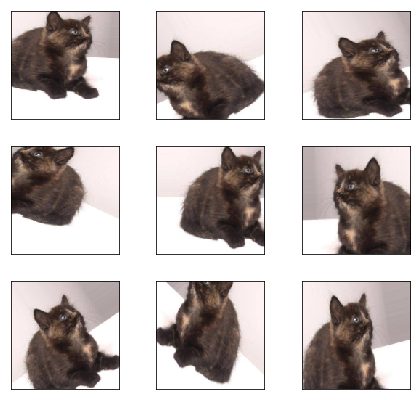

In [8]:
# plot 9 augmenting images
fig = plt.figure(figsize = (6,6))
for i,batch in enumerate(datagen.flow(x,batch_size = 1)):
    plt.subplot(3,3,i+1)
    plt.tight_layout() # Auto-fit sub-picture size
    
    #image.array_to_img convert array to image
    plt.imshow(image.array_to_img(batch[0]))
    plt.xticks([]) # delete x axis marks
    plt.yticks([])
    if i==8:
        break

plt.show()

#### Construct models

In [10]:
from keras import models, layers, optimizers

In [11]:
model = models.Sequential() 

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 

# Add dropout layer before fully-connected layer
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size = (150,150),
        batch_size = 32,
        class_mode = 'binary'
)
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size = (150,150),
        batch_size = 32,
        class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 50,
    epochs = 30,
    validation_data = test_generator,
    validation_steps = 50
)

Epoch 1/30
50/50 [==============================] - 56s 1s/step - loss: 0.6938 - acc: 0.5328 - val_loss: 0.6855 - val_acc: 0.5082
Epoch 2/30
50/50 [==============================] - 46s 912ms/step - loss: 0.6888 - acc: 0.5175 - val_loss: 0.6981 - val_acc: 0.5599
Epoch 3/30
50/50 [==============================] - 46s 913ms/step - loss: 0.6849 - acc: 0.5455 - val_loss: 0.6845 - val_acc: 0.5095
Epoch 4/30
50/50 [==============================] - 46s 917ms/step - loss: 0.6751 - acc: 0.5732 - val_loss: 0.6366 - val_acc: 0.6108
Epoch 5/30
50/50 [==============================] - 45s 905ms/step - loss: 0.6659 - acc: 0.5925 - val_loss: 0.6488 - val_acc: 0.6307
Epoch 6/30
50/50 [==============================] - 47s 936ms/step - loss: 0.6585 - acc: 0.5995 - val_loss: 0.6913 - val_acc: 0.5612
Epoch 7/30
50/50 [==============================] - 47s 945ms/step - loss: 0.6393 - acc: 0.6307 - val_loss: 0.6489 - val_acc: 0.6466
Epoch 8/30
50/50 [==============================] - 49s 977ms/step - los

In [15]:
model.save('cats_and_dogs_augment.h5')

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

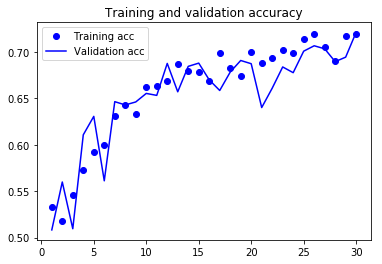

In [17]:
epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

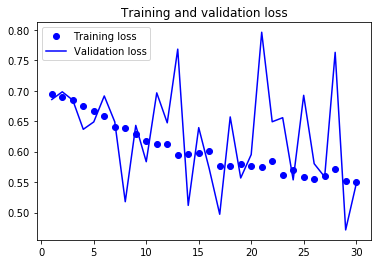

In [18]:
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()  
plt.show()